<a href="https://colab.research.google.com/github/ikhsanaziz/san/blob/master/Rock_Paper_Scissors_in_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
import cv2
import os
import numpy as np
from google.colab import files

In [2]:
!pip install gdown

In [3]:
!gdown https://drive.google.com/uc?id=1ulxk0tlNhF1qO_pEKbLsXhNqzKCD91e1

Downloading...
From: https://drive.google.com/uc?id=1ulxk0tlNhF1qO_pEKbLsXhNqzKCD91e1
To: /content/rockpaperscissors.zip
321MB [00:04, 77.9MB/s]


In [ ]:
!unzip /content/rockpaperscissors.zip

In [5]:
train_path = "/content/rockpaperscissors/train"
valid_path = "/content/rockpaperscissors/val"

In [6]:
train_rock_dir = os.path.join(train_path, 'rock')

train_paper_dir = os.path.join(train_path, 'paper')

train_scissors_dir = os.path.join(train_path, 'scissors')

validation_rock_dir = os.path.join(valid_path, 'rock')

validation_paper_dir = os.path.join(valid_path, 'paper')

validation_scissors_dir = os.path.join(valid_path, 'scissors')

In [7]:
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    validation_split = 0.4,
    fill_mode='nearest')
    
valid_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    validation_split = 0.4,
    fill_mode='nearest')

In [8]:
train_dataset = train_data.flow_from_directory(
        train_path,
        target_size=(150, 150),
        batch_size=32,
        subset = 'training',
        class_mode='categorical')
    
validation_dataset = valid_data.flow_from_directory(
        valid_path,
        target_size=(150, 150),
        batch_size=32,
        subset = 'validation',
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [9]:
train_dataset.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',
                           input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(
      train_dataset,
      steps_per_epoch=10,
      epochs=10,
      validation_data=validation_dataset,
      validation_steps=5,
      verbose=2)

Saving 5DdrFpDc8YbG1oCo.png to 5DdrFpDc8YbG1oCo.png
[[0. 0. 1.]]
5DdrFpDc8YbG1oCo.png
scissors


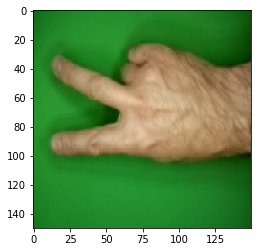

In [32]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  img = image.load_img(fn, target_size=(150,150))
  plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  predictions = model.predict(images)
  print(predictions)
  print(fn)
  if predictions[0][0]==1:
    print('paper')
  elif predictions[0][1]==1:
    print('rock')
  else:
    print('scissors')